In [112]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

> inplace: 원래 함수에서 새로운 데이터를 만들어 반환하지만 `inplace=True`의 경우 반환 없이 기존 데이터를 수정
> 그래서 ffilll() 의 리턴값에 None이 포함됨, 말그대로 in-place

In [113]:
x = pd.read_csv("../data/credit_card.csv").drop("CUST_ID", axis=1)
x.ffill(inplace=True)  # Do not use method='ffill' in fillna() func, is deprecated.

x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [114]:
x_scaled = StandardScaler().fit_transform(x)
x_normalized = normalize(x_scaled)  # 가우스 분포로 정규화
x_normalized = pd.DataFrame(  # 넘파이 -> 데이터프레임 (근데 왜 타입캐스팅?)
    x_normalized
)

In [115]:
pca = PCA(n_components=2)  # 2차원으로 축소
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']

x_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268880
3,-0.481657,-0.097610
4,-0.563512,-0.482506


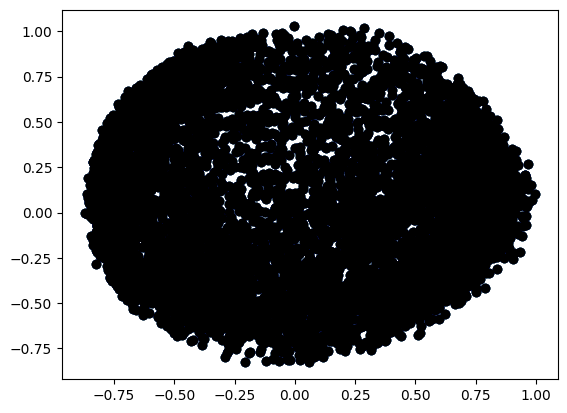

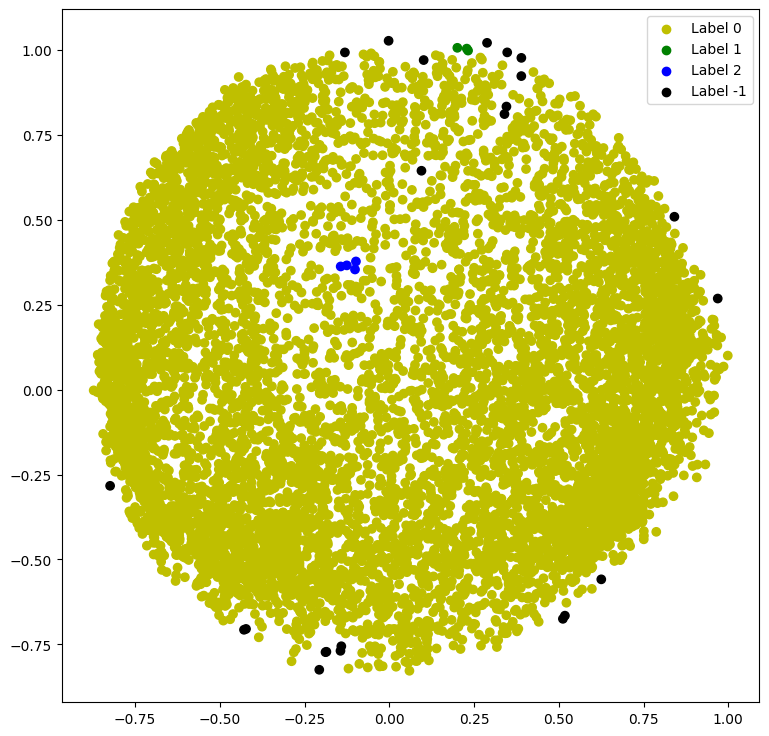

In [116]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(x_principal)
labels = db_default.labels_

colours = {0: 'y', 1: 'g', 2: 'b', -1: 'k'}

cvec = [colours[label] for label in labels]

r = plt.scatter(x_principal['P1'], x_principal['P2'], color='y')
g = plt.scatter(x_principal['P1'], x_principal['P2'], color='g')
b = plt.scatter(x_principal['P1'], x_principal['P2'], color='b')
k = plt.scatter(x_principal['P1'], x_principal['P2'], color='k')

plt.figure(figsize=(9, 9))
plt.scatter(x_principal['P1'], x_principal['P2'], c=cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))  # legend: 범례

plt.show()

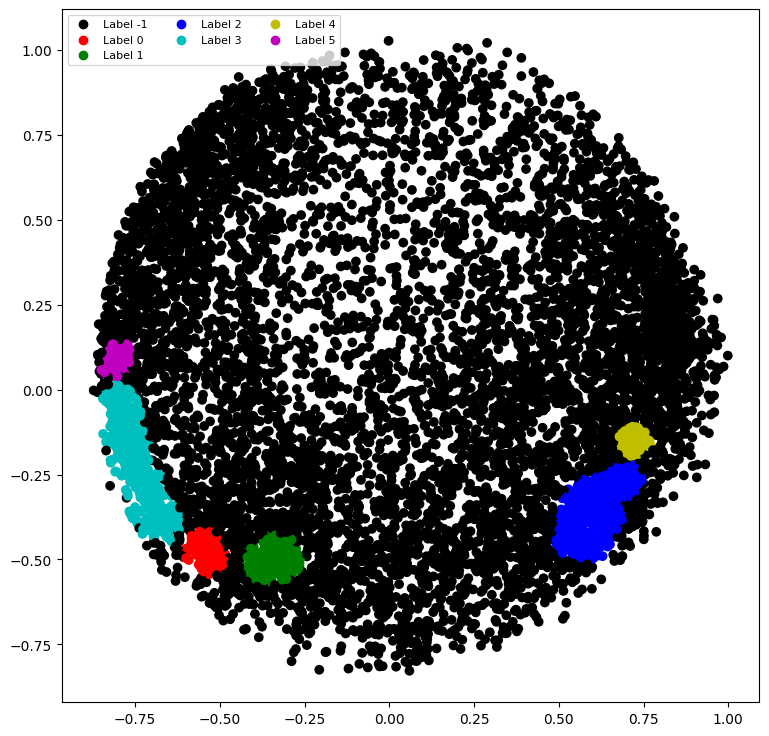

In [119]:
# Model tuning
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

db = DBSCAN(eps=0.0375, min_samples=50).fit(x_principal)

labels1 = db.labels_

# Define colors and labels in one list
colour_labels = [
    ('k', 'Label -1'),
    ('r', 'Label 0'),
    ('g', 'Label 1'),
    ('b', 'Label 2'),
    ('c', 'Label 3'),
    ('y', 'Label 4'),
    ('m', 'Label 5'),
]

colours1 = {i - 1: color for i, (color, _) in enumerate(colour_labels)}
cvec = [colours1[label] for label in labels1]

plt.figure(figsize=(9, 9))
plt.scatter(x_principal['P1'], x_principal['P2'], c=cvec)

# Add legend iterating over labels and colors
handles = []
for color, label in colour_labels:
    handles.append(plt.scatter([], [], marker='o', color=color))

plt.legend(handles,
           [label for _, label in colour_labels],
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()

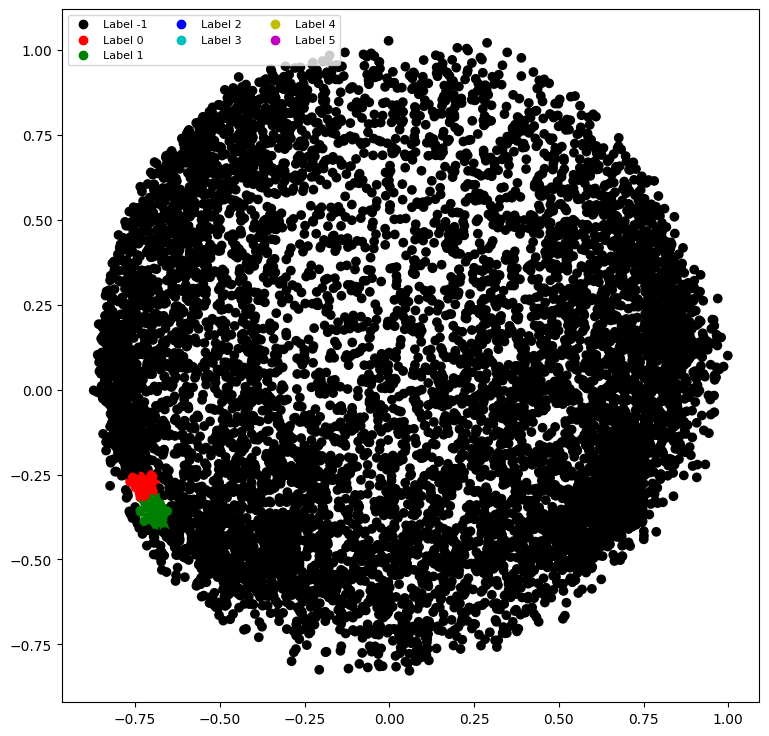

In [121]:
### ===[ 위 코드와 동일 ]=== ###
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

db = DBSCAN(eps=0.0375, min_samples=100).fit(x_principal)

labels1 = db.labels_

colour_labels = [
    ('k', 'Label -1'),
    ('r', 'Label 0'),
    ('g', 'Label 1'),
    ('b', 'Label 2'),
    ('c', 'Label 3'),
    ('y', 'Label 4'),
    ('m', 'Label 5'),
]

colours1 = {i - 1: color for i, (color, _) in enumerate(colour_labels)}
cvec = [colours1[label] for label in labels1]

plt.figure(figsize=(9, 9))
plt.scatter(x_principal['P1'], x_principal['P2'], c=cvec)

handles = []
for color, label in colour_labels:
    handles.append(plt.scatter([], [], marker='o', color=color))

plt.legend(handles,
           [label for _, label in colour_labels],
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()